In [1]:
#import the necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns; 
sns.set()
%matplotlib inline

In [2]:
#read dataset
dir_train = 'week3_challenge.csv'
dfs = pd.read_csv(dir_train, low_memory = False)

In [3]:
#recopied the dataset to another variable
df = dfs

In [4]:
#number of columns in the full dataset
len(df.columns)

290

In [5]:
#drop redundant columns/variables
df.drop(['Unnamed: 0','SystemCustomerID','SystemLoanID','__v'], axis=1, inplace = True)

In [6]:
#these columns are dropped
dfgreaterthan30p = df.loc[:, df.isnull().mean() > .3]
len(dfgreaterthan30p.columns)

18

In [7]:
#these are the columns we use which have null values less than or equal to 30%
dflessthan30p = df.loc[:, df.isnull().mean() <= .3]
len(dflessthan30p.columns)

268

In [8]:
#dtypes of columns
dflessthan30p.dtypes.unique() 

array([dtype('int64'), dtype('O'), dtype('bool'), dtype('float64')],
      dtype=object)

In [9]:
#selected columns with float64,int64 dtypes
dfx = dflessthan30p.select_dtypes(include=['float64','int64'])

In [10]:
#the number of columns
len(dfx.columns)

245

In [11]:
#fill null values with 0
dfx = dfx.fillna(0)

In [12]:
# standardize features
#x = StandardScaler().fit_transform(dfx)
x = preprocessing.scale(dfx)
x = pd.DataFrame(x)
x = x.values

C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


PCA

In [13]:
# create pca
pca = PCA(n_components=5)

In [14]:
# fit the data to the model
principalComponents = pca.fit_transform(x)

In [15]:
# create dataframe containing principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'
                , 'principal component 3', 'principal component 4', 'principal component 5'])

In [16]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.222108,-2.281546,0.755765,-1.595385,4.226973
1,13.462088,-3.664345,-2.140062,-0.890497,-0.205284
2,5.899029,-2.358166,0.095029,0.483682,0.250615
3,-1.883213,1.364043,-0.216815,3.303160,0.280666
4,2.634715,1.757006,0.568668,-2.890805,-0.873507


In [17]:
pca.explained_variance_ratio_

array([0.35394189, 0.09382532, 0.03817359, 0.03368653, 0.02755903])

In [18]:
pca.explained_variance_ratio_.sum()

0.547186365334793

KMEANS

In [19]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3, random_state = 0)

In [20]:
principalDf = principalDf.values
# fit data 
model.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [21]:
# get clusters
clusters = model.predict(principalDf)

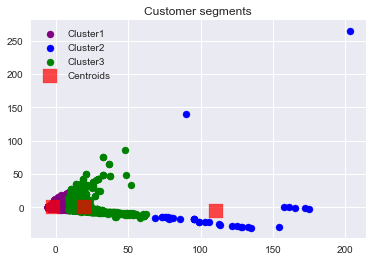

In [22]:
#Visualising the clusters
plt.scatter(principalDf[clusters==0,0], principalDf[clusters==0,1], c='purple', s=50, label='Cluster1')
plt.scatter(principalDf[clusters==1,0], principalDf[clusters==1,1], c='blue', s=50, label='Cluster2')
plt.scatter(principalDf[clusters==2,0], principalDf[clusters==2,1], c='green', s=50, label='Cluster3')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker = 's', c='red', s=200, alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

In [23]:
#beginning of the cluster numbering with 1 instead of 0
clusters1 = clusters
clusters1 = clusters + 1

In [24]:
#New Dataframe called clusterx
clusterx = pd.DataFrame(clusters1)

Reconnected the final clusters of each observation to the original dataframe and some exploratory analysis.

In [25]:
#Adding clusterx to the Original dataset
dfs['clusterx'] = clusterx

In [26]:
#Mean of income and other clusters groupby clusterx
print("MEAN OF INCOME AND VARIOUS FEATURES GROUPBY CLUSTERX")
kmeans_mean_cluster = pd.DataFrame(round(dfs.groupby('clusterx').mean(),1))

kmeans_mean_cluster

MEAN OF INCOME AND VARIOUS FEATURES GROUPBY CLUSTERX


,createdAt_Month,income_verified,next_loan_number,Income,score,demofeatures_debt_to_income_ratio,demofeatures_net_income_band,demofeatures_appweek,demofeatures_payweek,demofeatures_age_at_application_yrs,...,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,obiResult_score
clusterx,,,,,,,,,,,,,,,,,,,,,
1,201834.8,True,1.3,45874.0,0.8,25.5,89461.2,2.4,4.0,29.5,...,15.6,2.9,17859.8,0.8,0.8,73.2,187.8,447.1,37594.7,412.9
2,201822.6,True,3.6,84844.6,0.9,14.4,125694.4,2.8,3.8,31.5,...,176.1,119.2,540491.6,0.8,0.8,936.6,7127.6,14964.0,57441.2,411.6
3,201828.6,True,2.6,54904.4,0.8,29.4,103959.5,2.6,3.7,31.9,...,74.9,16.3,114443.5,0.7,0.7,287.7,1419.2,3270.0,43168.3,416.5
